In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")


In [40]:

df = pd.read_csv("Processed_Heart_Data.csv")
df2=df

In [43]:
df.describe()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,159897.000000,0.085595,0.298634,0.412477,0.068097,0.037740,0.112390,0.129946,0.138870,0.524727,...,0.843206,0.021204,0.127588,0.008002,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779
std,92317.009005,0.279766,0.067012,0.492281,0.251912,0.190567,0.265028,0.265175,0.345812,0.499389,...,0.363607,0.144065,0.333631,0.089095,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883
min,0.000000,0.000000,0.126726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79948.500000,0.000000,0.253347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,159897.000000,0.000000,0.288245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,239845.500000,0.000000,0.331260,1.000000,0.000000,0.000000,0.066667,0.100000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,319794.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ValueError: min() arg is an empty sequence

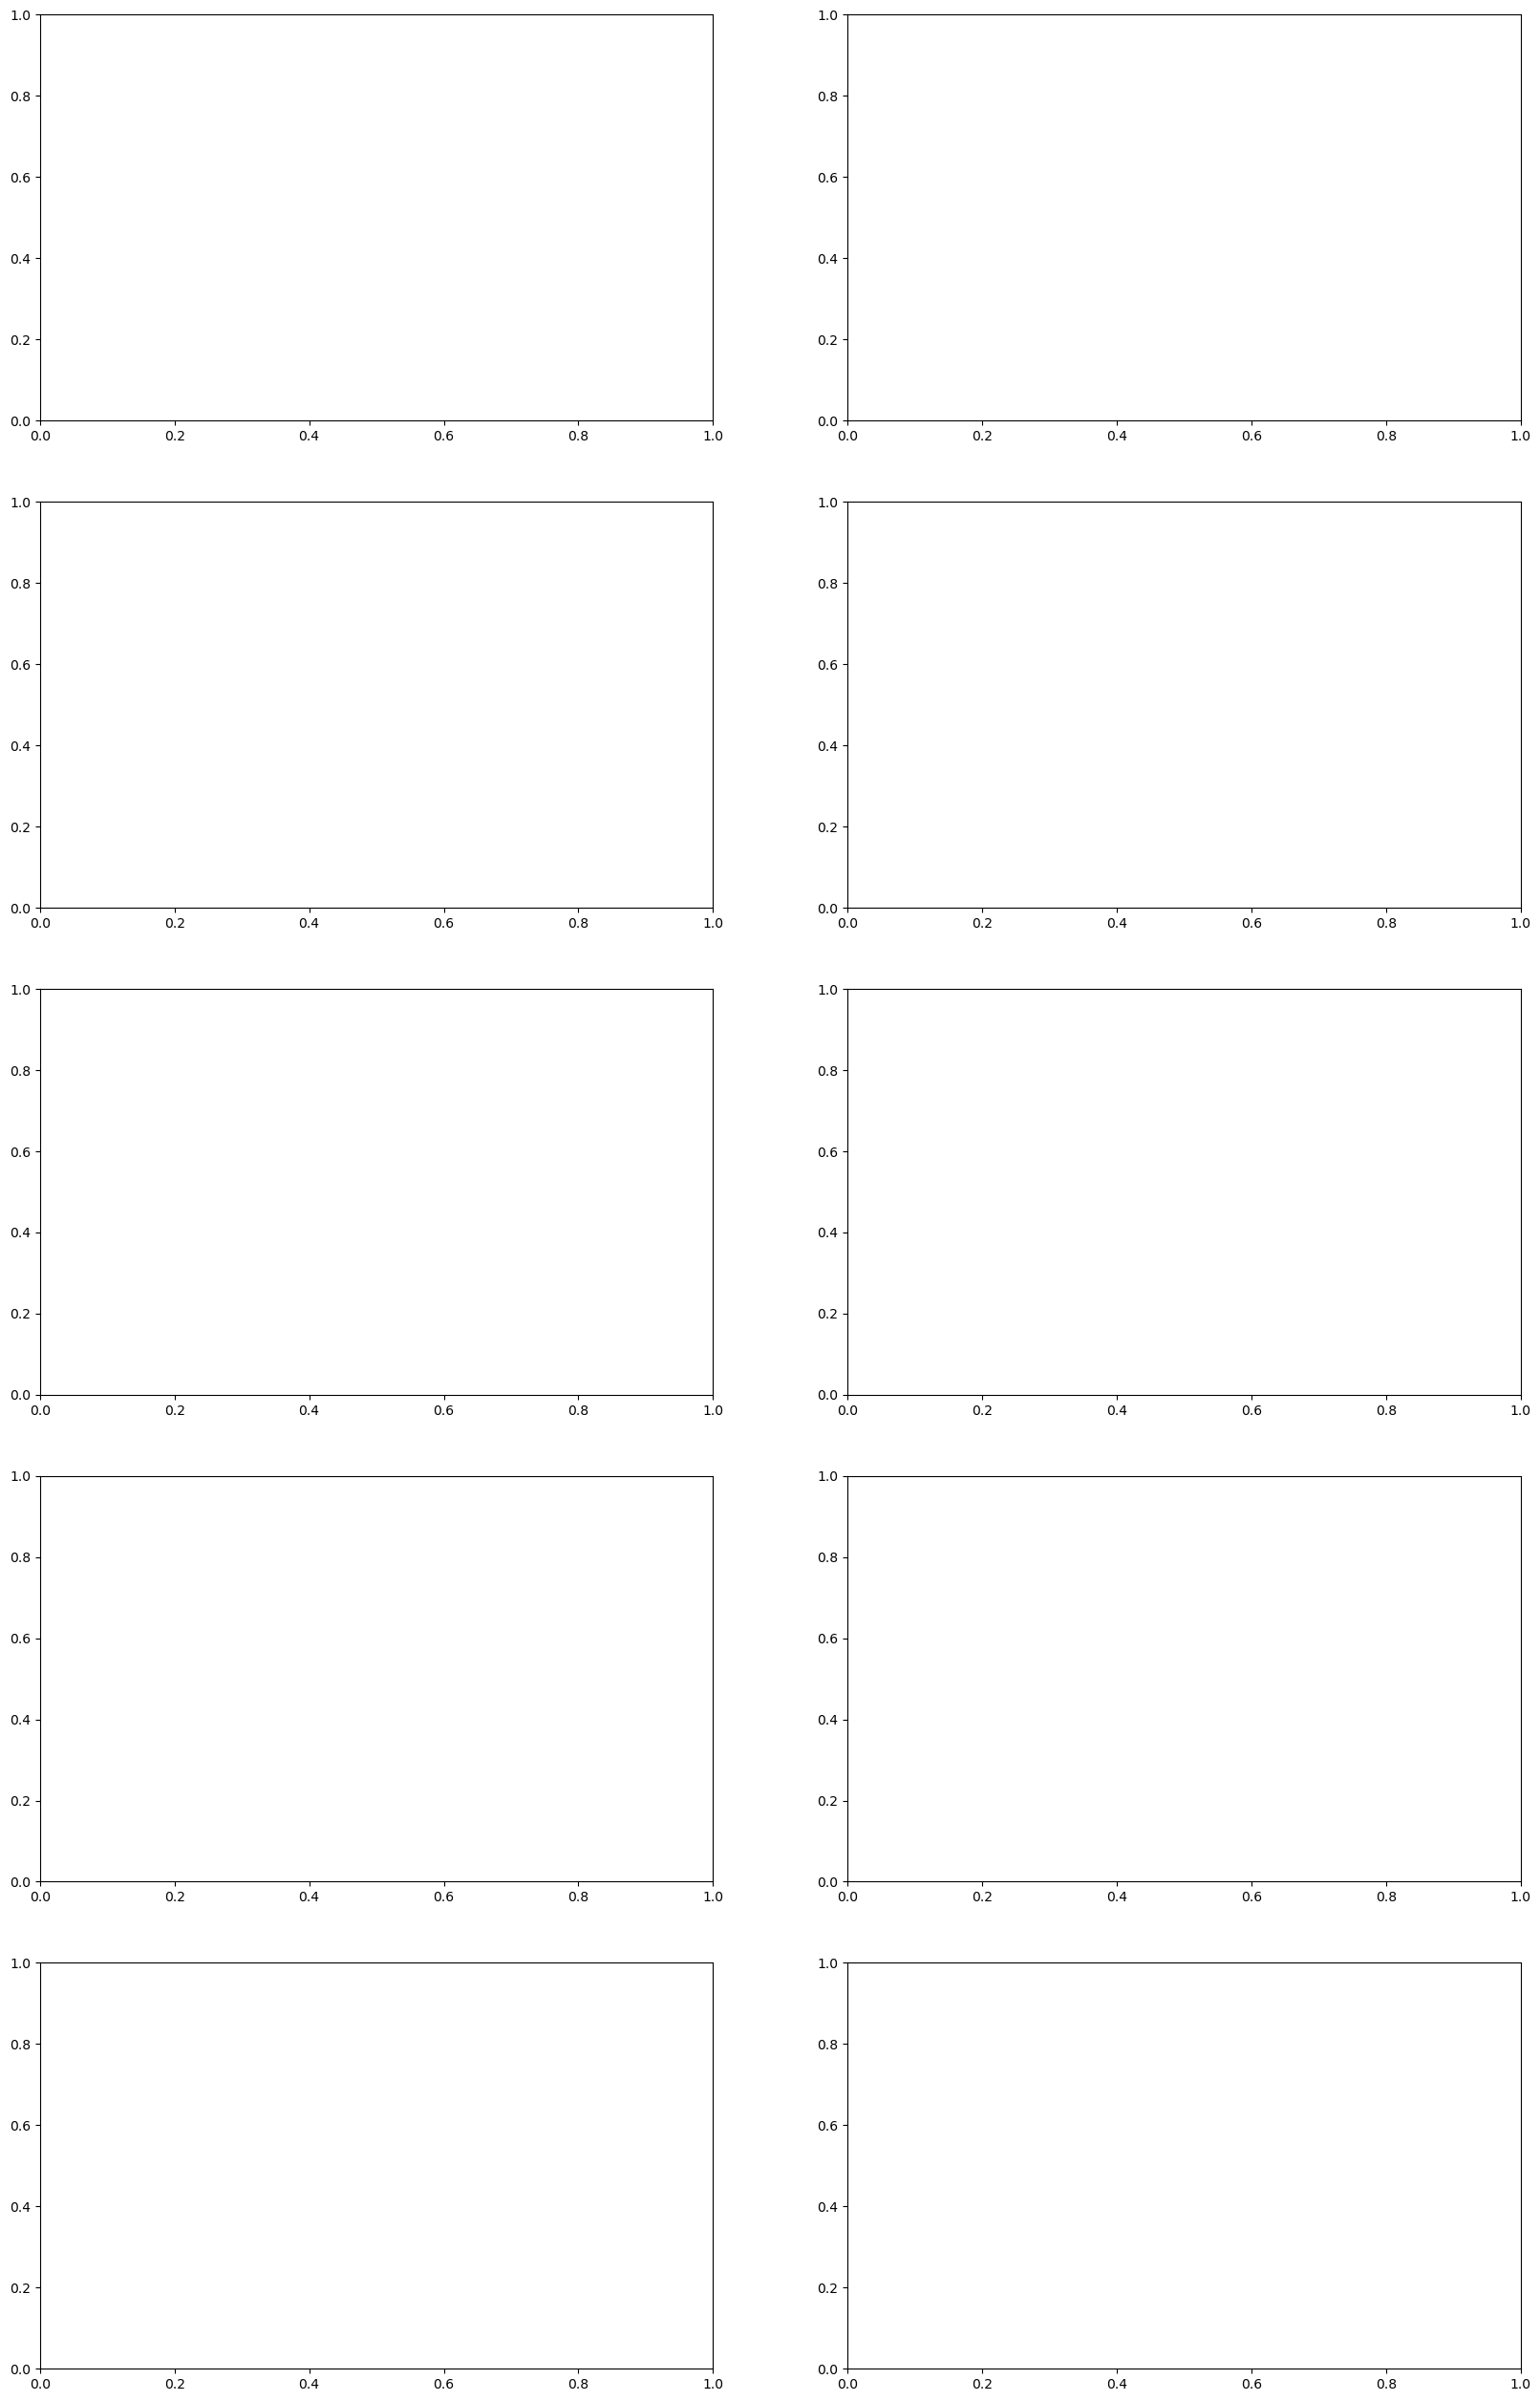

## our target is unbalanced

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x=df2.drop('HeartDisease',axis=1).values
y=df2['HeartDisease'].values
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(x, y)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

## XGBoost

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 500 , max_depth= 3 , learning_rate = 0.1)
xgb.fit(x_train , y_train);
print (xgb.score(x_train , y_train))
print (xgb.score(x_test , y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb.predict(x_test)))

0.9533330076455214
0.9523008879820352
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     87576
         1.0       0.99      0.91      0.95     87878

    accuracy                           0.95    175454
   macro avg       0.96      0.95      0.95    175454
weighted avg       0.96      0.95      0.95    175454



In [63]:
for i in range(63959):
    if (y_pred[i] == 0):
        print(i)

2
3
7
19
20
25
27
30
32
34
37
45
53
54
59
62
64
65
66
67
71
74
75
76
77
79
81
85
86
91
92
93
96
100
102
103
104
105
107
108
112
115
116
117
121
125
126
127
129
130
131
133
137
141
142
144
146
149
150
153
154
155
156
157
162
163
164
169
170
173
176
177
185
187
189
190
193
196
197
198
204
205
206
208
210
216
217
218
219
223
224
225
227
228
229
230
231
232
234
236
238
239
240
242
245
246
249
252
254
255
256
262
263
265
268
272
273
274
275
276
277
280
281
286
289
290
291
292
293
294
298
302
304
307
309
310
311
313
321
322
332
334
337
341
346
353
355
356
357
358
360
363
366
367
368
369
373
378
380
382
385
388
390
391
393
394
396
402
405
408
411
412
414
415
418
419
421
423
425
426
427
428
433
434
435
439
444
448
450
454
460
461
462
464
469
470
471
472
473
474
477
478
480
483
485
488
489
490
492
494
496
497
499
501
502
504
505
508
509
511
512
513
514
515
516
519
523
524
525
527
529
530
538
539
540
546
554
555
557
566
568
570
571
572
573
574
575
577
582
585
587
588
591
596
602
604
605
607
609


0.9533330076455214
0.9523008879820352


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     87576
         1.0       0.99      0.91      0.95     87878

    accuracy                           0.95    175454
   macro avg       0.96      0.95      0.95    175454
weighted avg       0.96      0.95      0.95    175454

